## <b> World Happiness Analysis</b>
### กลุ่ม Batman
1. รหัสนิสิต: <span style="color:darkgreen">6142752026</span> ชื่อ นามสกุล: <span style="color:darkgreen">ชิตวรี หอมผล</span>
2. รหัสนิสิต: <span style="color:darkgreen">6142896726</span> ชื่อ นามสกุล: <span style="color:darkgreen">ศุภกฤต ศุภภิญโญ</span>
3. รหัสนิสิต: <span style="color:darkgreen">6142923026</span> ชื่อ นามสกุล: <span style="color:darkgreen">สุพิชชา สวัสดิ์อักษรชื่น</span>

#### <b>ความสุขคืออะไร ? </b>
ความสุขคือสิ่งที่ทุกคนบนโลกล้วนอยากจะสัมผัส ซึ่งคำนิยามความสุขของแต่ละคนก็ไม่เหมือนกัน บ้างก็บอกการมีชื่อเสียงเงินทอง มีคุณภาพชีวิตที่ดี มีการศึกษาที่ดี การไม่มีโรคภัยไข้เจ็บ นั่นแหละคือความสุขของพวกเขา เราจะมาดูกันว่า ความสุขของคนบนโลกมีแนวโน้มว่าขึ้นอยู่กับปัจจัยใดบ้าง

สหประชาชาติได้จัดทำรายงานความสุขของโลกในแต่ละปี (United Nations World Happiness Report) โดยให้ประชาชนในประเทศนั้น ๆ ให้คะแนนความสุขของตัวเอง ตั้งแต่ 0 ถึง 10 จากการวิเคราะห์ผ่านตัวแปรทั้งหมด 6 ด้าน ได้แก่ 
1. มูลค่าผลิตภัณฑ์มวลรวมประเทศ (GDP)
2. การสนับสนุนทางสังคม (Social support)
3. อายุขัยเฉลี่ย (Healthy life expantancy)
4. เสรีภาพในการใช้ชีวิต (Freedom to make life choices)
5. ความเอื้อเฟื้อเผื่อแผ่ (Generosity)
6. ระดับการคอรัปชั่น (Perceptions of corruption)

## <b>EDA and Prediction</b>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style = 'white')

### <b>1. World Happiness 2020 DataFrame</b>

In [2]:
# Read csv
df=pd.read_csv('Happiness_Ranking_2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [3]:
# data checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [4]:
# data cleaning
df=df.rename(columns={'Country name':'Country','Ladder score':'Happiness_score'})

# ย้ายเฉพาะคอลัมน์ที่ต้องการไปที่ hp
hp=df[['Country','Regional indicator','Happiness_score','Social support','Healthy life expectancy','Logged GDP per capita','Freedom to make life choices','Generosity','Perceptions of corruption']]

# กำหนด Country ให้เป็น index
hp=hp.set_index('Country')
hp.head()

,Regional indicator,Happiness_score,Social support,Healthy life expectancy,Logged GDP per capita,Freedom to make life choices,Generosity,Perceptions of corruption
Country,,,,,,,,
Finland,Western Europe,7.8087,0.954330,71.900825,10.639267,0.949172,-0.059482,0.195445
Denmark,Western Europe,7.6456,0.955991,72.402504,10.774001,0.951444,0.066202,0.168489
Switzerland,Western Europe,7.5599,0.942847,74.102448,10.979933,0.921337,0.105911,0.303728
Iceland,Western Europe,7.5045,0.974670,73.000000,10.772559,0.948892,0.246944,0.711710
Norway,Western Europe,7.4880,0.952487,73.200783,11.087804,0.955750,0.134533,0.263218


### <b>2. Quality of Life 2020 DataFrame</b>

In [5]:
# Read html 
df2=pd.read_html('https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2020')
df2[1].head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,NaN,Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
1,NaN,Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
2,NaN,Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
3,NaN,Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
4,NaN,Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61


In [7]:
# data checking
df2[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            0 non-null      float64
 1   Country                         80 non-null     object 
 2   Quality of Life Index           80 non-null     float64
 3   Purchasing Power Index          80 non-null     float64
 4   Safety Index                    80 non-null     float64
 5   Health Care Index               80 non-null     float64
 6   Cost of Living Index            80 non-null     float64
 7   Property Price to Income Ratio  80 non-null     float64
 8   Traffic Commute Time Index      80 non-null     float64
 9   Pollution Index                 80 non-null     float64
 10  Climate Index                   80 non-null     float64
dtypes: float64(10), object(1)
memory usage: 7.0+ KB


In [17]:
# เช็กจำนวนข้อมูลที่ไม่ใช่ตัวเลข
df2[1].isna().sum()

Rank                              80
Country                            0
Quality of Life Index              0
Purchasing Power Index             0
Safety Index                       0
Health Care Index                  0
Cost of Living Index               0
Property Price to Income Ratio     0
Traffic Commute Time Index         0
Pollution Index                    0
Climate Index                      0
dtype: int64

In [18]:
# เลือกดาต้าเฟรมแล้วย้ายไปที่ ql
ql=df2[1]

# กำหนด Country ให้เป็น index 
ql=ql.drop(columns='Rank')
ql=ql.set_index('Country')
ql.head()

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Country,,,,,,,,,
Denmark,192.67,100.88,74.90,80.00,83.00,7.45,28.85,21.33,81.80
Switzerland,192.01,119.53,78.40,72.44,122.40,8.68,29.09,22.39,79.24
Finland,190.22,99.93,76.68,75.79,70.29,8.35,29.90,11.55,58.87
Australia,186.21,107.31,58.64,77.38,73.54,7.52,34.73,23.46,92.70
Netherlands,183.67,90.73,72.38,74.65,73.75,7.51,29.43,27.41,87.61


### <b>3. Education 2020 DataFrame</b>

In [19]:
# Read html
df3=pd.read_html('https://ceoworld.biz/2020/05/10/ranked-worlds-best-countries-for-education-system-2020/')

# เลือกดาต้าเฟรมแรก
df3=df3[0]
df3.head()

,Rank,Country,Quality Index,Opportunity Index
0,1,United Kingdom,78.2,69.79
1,2,United States,72.0,68.74
2,3,Australia,70.5,67.52
3,4,Netherlands,70.3,67.21
4,5,Sweden,70.1,66.96


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               93 non-null     int64  
 1   Country            93 non-null     object 
 2   Quality Index      93 non-null     float64
 3   Opportunity Index  93 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ KB


In [21]:
# data cleaning
df3=df3.drop(columns='Rank')

# เปลี่ยนชื่อคอลัมน์
df3=df3.rename(columns={'Quality Index':'Education Quality Index', 'Opportunity Index':'Education Opportunity Index'})

# ย้ายดาต้าเฟรมไปที่ ed
ed=df3

# กำหนด Country ให้เป็น index
ed=ed.set_index('Country')
ed.head()

,Education Quality Index,Education Opportunity Index
Country,,
United Kingdom,78.2,69.79
United States,72.0,68.74
Australia,70.5,67.52
Netherlands,70.3,67.21
Sweden,70.1,66.96


## <b>Data Exploration</b>

### <b>1. ปัจจัยใดที่เกี่ยวข้องกับความสุขของประชากรโลก</b>
* หา Correlation ของทั้ง 6 ปัจจัยเทียบกับ Happiness_score

Text(0.5, 1.0, 'Correlation of happiness score \n with other variables')

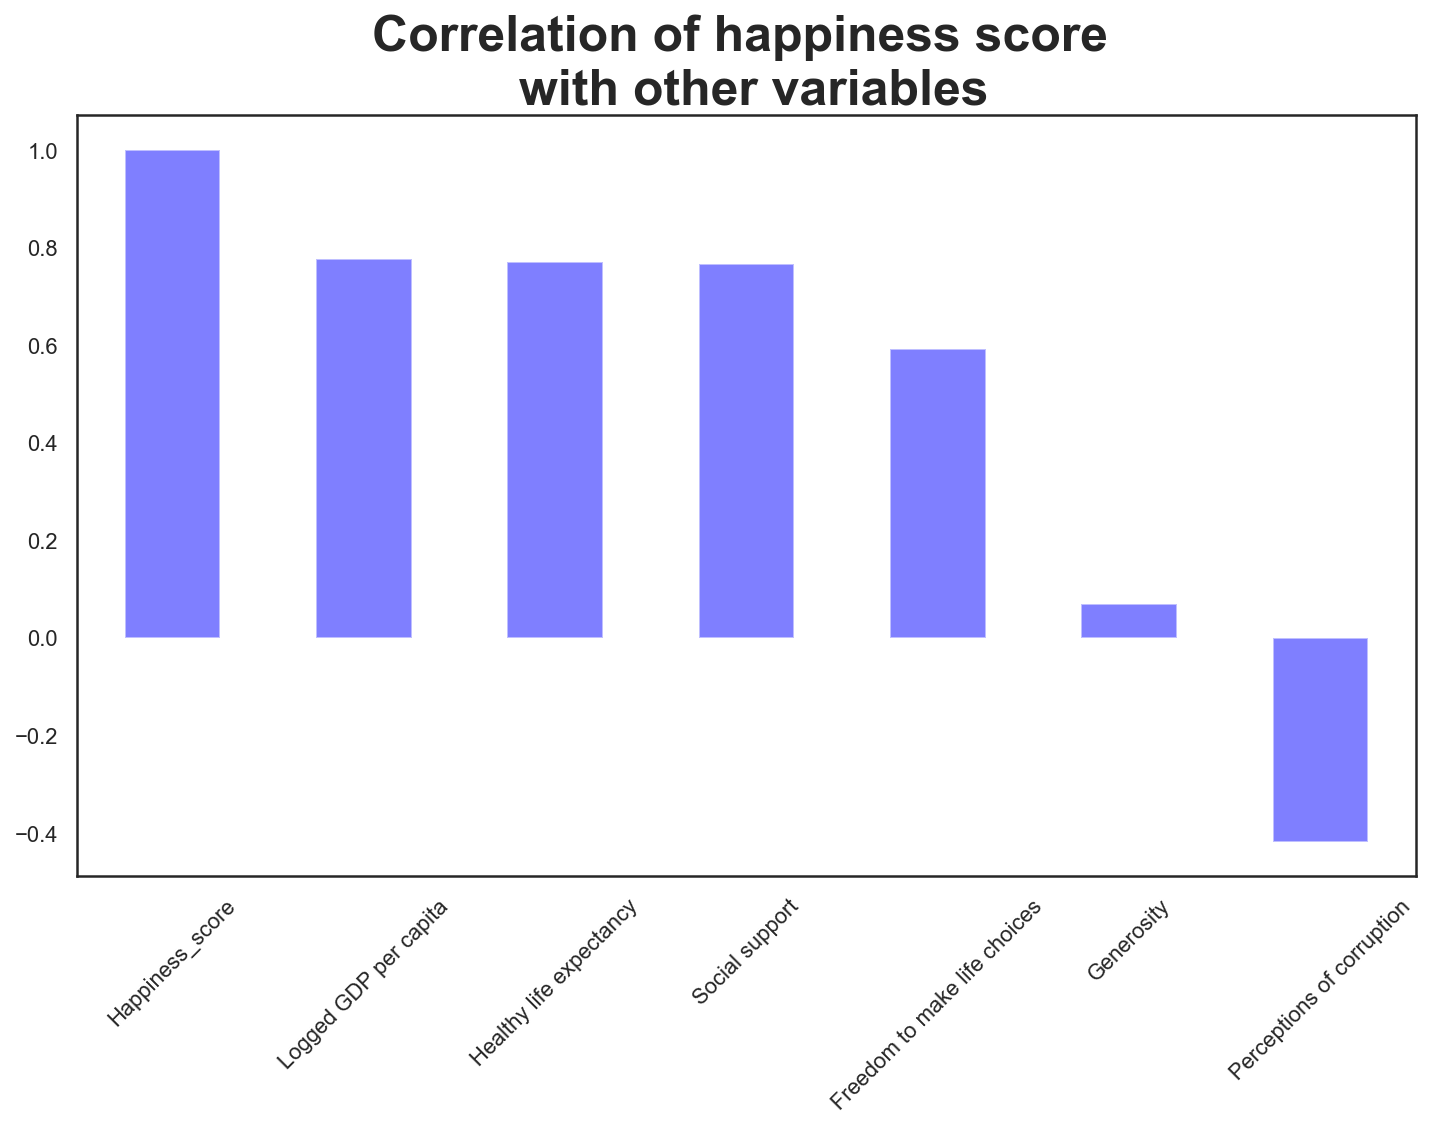

In [22]:
# graph
plt.figure(figsize=(12,7))
hp.corr()['Happiness_score'].sort_values(ascending = False).plot(kind='bar',color='blue',alpha=0.5,rot=45)
plt.title("Correlation of happiness score \n with other variables",fontsize=25,fontweight="bold")

* จากกราฟพบว่าปัจจัยที่<span style="color:green">มีความสัมพันธ์กันโดยตรง</span>กับ Happiness score คือ 
     * [x] ผลิตภัณฑ์มวลรวมของประเทศ (Logged GDP per capita)
     * [x] อายุขัยเฉลี่ย (Health life expectancy)
     * [x] การสนับสนุนทางสังคม (Social support)
     * [x] เสรีภาพในการใช้ชีวิต (Freedom to make life choices)
* ปัจจัยที่มีความสัมพันธ์กันโดยตรงอย่างน้อยกับ Happiness score คือ ความเอื้อเฟื้อเผื่อแผ่ (Generosity)
* ปัจจัยที่<span style="color:red">มีความสัมพันธ์กันในเชิงตรงกันข้าม</span>กับ Happiness score คือ ระดับการคอรัปชัน (Perceptions of corruption)

### <b>2. ปัจจัยนอกเหนือที่มีผลต่อความสุขของประชากรโลก</b>
มีสำนักข่าวหนึ่งได้สัมภาษณ์ประชาชนในเมืองเอสปูว่ารู้สึกอย่างไรกับประเทศของตน ซึ่งเธอตอบประมาณว่าเธอคิดว่าทุกอย่างในสังคม ถูกจัดสรรค์มาเพื่อให้ประชาชนประสบความสำเร็จได้ ไม่ว่าจะเป็นเรื่องของการเรียน การขนส่ง หรือคุณภาพชีวิตล้วนแล้วแต่ดีมาก
เราจึงจะมาดูกันว่าคะแนนความสุขของแต่ละประเทศนั้นมีความสัมพันธ์กันหรือไม่กับปัจจัยนอกเหนือจากที่สหประชาชาติได้กำหนด เช่น
1. คุณภาพชีวิต (Quality of Life) 
2. คุณภาพระบบการศึกษา (Education)

##### <b>เชื่อมตาราง World Happiness เข้ากับ Quality of Life</b>

In [23]:
# เชื่อมตารางโดยใช้ index Country เป็นตัวเชื่อม
hp_ql=ql.merge(hp,how='inner',on='Country')

##### <b>เชื่อมตาราง hp_ql เข้ากับ Education</b>

In [24]:
# เชื่อมตารางโดยใช้ index Country เป็นตัวเชื่อม 
hp_ql_ed=hp_ql.merge(ed,how='inner',on='Country')

In [25]:
# ตรวจสอบข้อมูล
hp_ql_ed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Denmark to Sri Lanka
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Quality of Life Index           60 non-null     float64
 1   Purchasing Power Index          60 non-null     float64
 2   Safety Index                    60 non-null     float64
 3   Health Care Index               60 non-null     float64
 4   Cost of Living Index            60 non-null     float64
 5   Property Price to Income Ratio  60 non-null     float64
 6   Traffic Commute Time Index      60 non-null     float64
 7   Pollution Index                 60 non-null     float64
 8   Climate Index                   60 non-null     float64
 9   Regional indicator              60 non-null     object 
 10  Happiness_score                 60 non-null     float64
 11  Social support                  60 non-null     float64
 12  Healthy life expectancy       

In [26]:
# ลบคอลัมน์ Regional indicator ออกเพราะเป็นชื่อทวีป
hp_ql_ed2=hp_ql_ed.drop(columns='Regional indicator')

# เลือกมาเฉพาะคอลัมน์หลักๆให้เพื่อวิเคราะห์ได้ง่าย
hp_ql_ed2=hp_ql_ed2[['Happiness_score','Quality of Life Index','Education Quality Index','Education Opportunity Index']]

#### <b>Correlation ของ World Happiness, Quality of life, และ Education</b>

Text(0.5, 1.0, 'Correlation\nHeatmap')

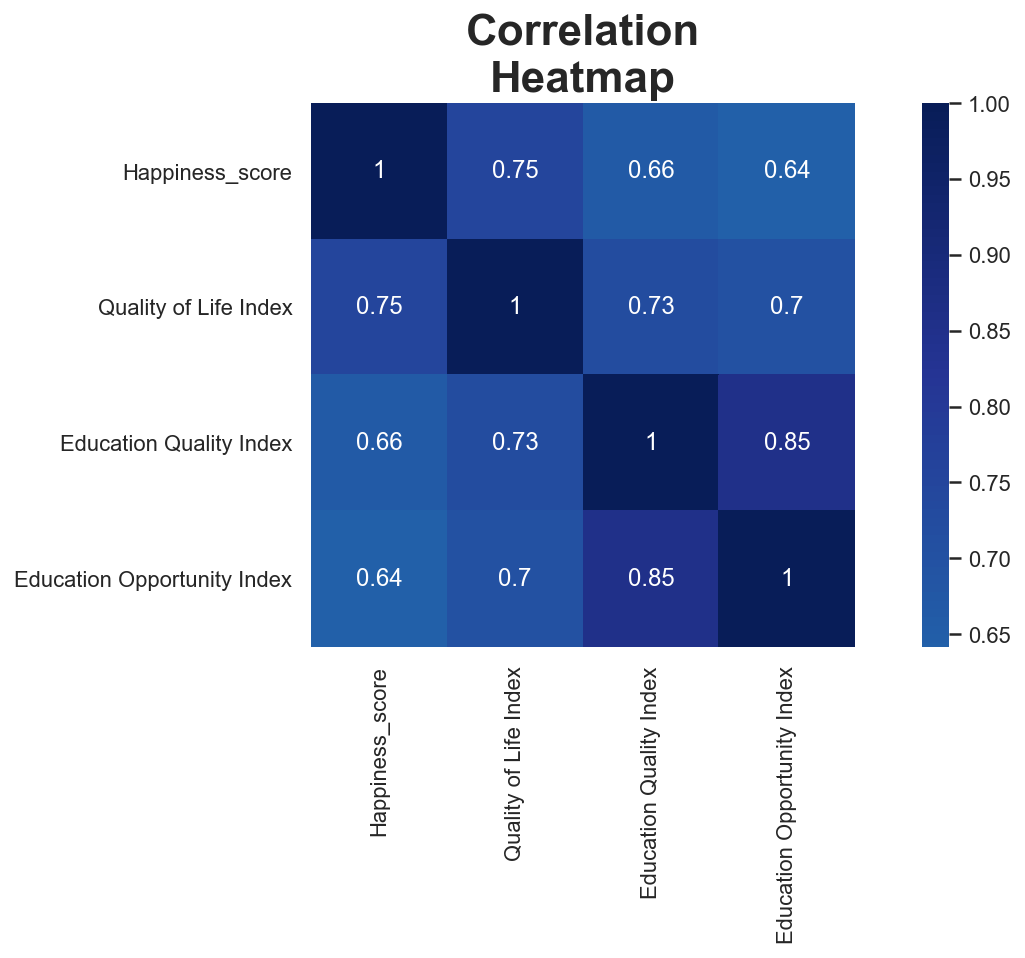

In [27]:
# สร้าง Heatmap ค่า correlation ของ World Happiness, Quality of life, และ Education
fig, ax = plt.subplots(figsize=(12,5)) 
sns.heatmap(hp_ql_ed2.corr(),cmap="YlGnBu",center=0.3,annot=True,ax=ax, square=True,fmt=".2g").set_title("Correlation\nHeatmap", fontsize=22,fontweight="bold")

* จากกราฟพบว่าทุกปัจจัยที่<span style="color:green">มีความสัมพันธ์กันโดยตรง</span>กับ Happiness score

### <b>3. 10 ประเทศที่มีความสุขที่สุดในโลก ระหว่างปี 2015 ถึง 2020</b> 

In [28]:
# ดึงข้อมูล
hp20=hp
hp19=pd.read_csv('Happiness_Ranking_2019.csv')
hp18=pd.read_csv('Happiness_Ranking_2018.csv')
hp17=pd.read_csv('Happiness_Ranking_2017.csv')
hp16=pd.read_csv('Happiness_Ranking_2016.csv')
hp15=pd.read_csv('Happiness_Ranking_2015.csv')

In [29]:
# เตรียมข้อมูล
hp20=hp20.rename(columns={'Happiness_score':'2020'})
hp19=hp19.rename(columns={'Score':'2019','Country or region':'Country'})
hp18=hp18.rename(columns={'Score':'2018','Country or region':'Country'})
hp17=hp17.rename(columns={'Happiness.Score':'2017'})
hp16=hp16.rename(columns={'Happiness Score':'2016'})
hp15=hp15.rename(columns={'Happiness Score':'2015'})

In [30]:
# สร้าง list รวม Dataframe ของ Happiness Score ตั้งแต่ปี 2015 - 2020
sixyrs= [hp15,hp16,hp17,hp18,hp19,hp20]

In [31]:
# Merge dataframe จาก list sixyrs ที่สร้างก่อนหน้า
from functools import reduce
fiftotwen = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],how='right'), sixyrs).fillna('void')

# กำหนด Country ให้เป็น index
fiftotwen_idx=fiftotwen.set_index('Country')

# เลือก 10 ประเทศแรก
topten_fiftotwen=fiftotwen_idx.iloc[:10]

# เลือกคอลัมน์ Happiness Score ของแต่ละปี
hp_topten_fiftotwen=topten_fiftotwen.loc[:,['2015','2016','2017','2018','2019','2020']]

In [32]:
# Transpose ตาราง เพื่อให้ Happiness Score ของแต่ละปีเป็น index
hpten = hp_topten_fiftotwen.T
hpten

Country,Finland,Denmark,Switzerland,Iceland,Norway,Netherlands,Sweden,New Zealand,Austria,Luxembourg
2015,7.406,7.527,7.587,7.561,7.522,7.378,7.364,7.286,7.2,6.946
2016,7.413,7.526,7.509,7.501,7.498,7.339,7.291,7.334,7.119,6.871
2017,7.469,7.522,7.494,7.504,7.537,7.377,7.284,7.314,7.006,6.863
2018,7.632,7.555,7.487,7.495,7.594,7.441,7.314,7.324,7.139,6.91
2019,7.769,7.6,7.48,7.494,7.554,7.488,7.343,7.307,7.246,7.09
2020,7.8087,7.6456,7.5599,7.5045,7.488,7.4489,7.3535,7.2996,7.2942,7.2375


Text(0.5, 1.0, 'Top 10 : Happiest Country from 2015-2020')

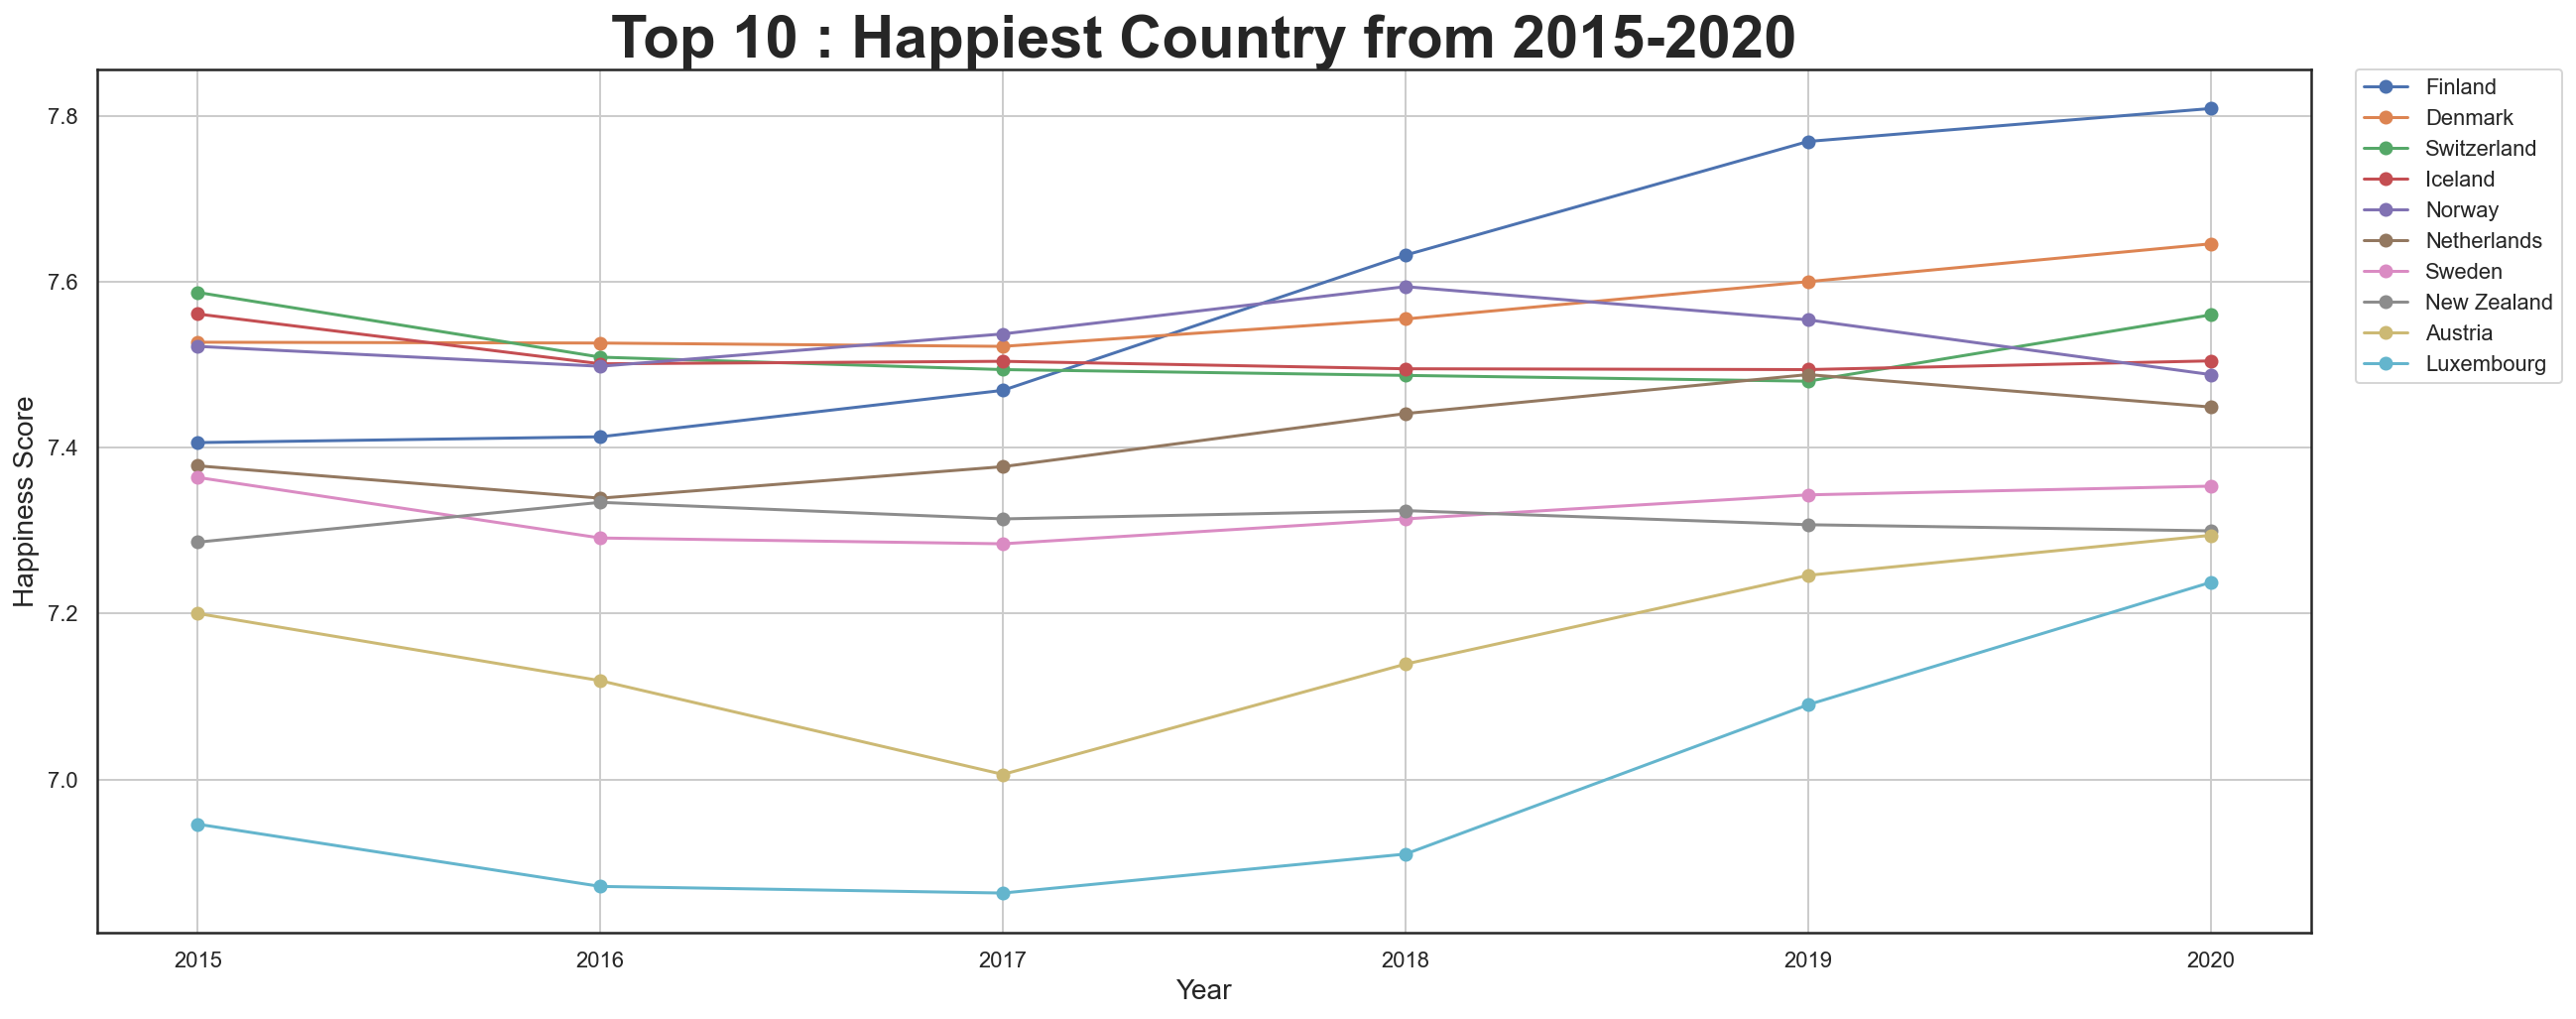

In [33]:
# นำข้อมูลมาสร้าง line graph
ch=hpten.plot(kind='line',marker='o',figsize=(20,8),grid=True)
ch.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
ch.set_ylabel('Happiness Score',size = 14)
ch.set_xlabel('Year',size = 14)
ch.set_title('Top 10 : Happiest Country from 2015-2020', size = 30,fontweight='bold')

* จากกราฟพบว่า เมื่อเทียบตั้งแต่ปี 2015 ถึง 2020 ทั้ง 10 ประเทศนี้จะมีแนวโน้มลดลงเป็นส่วนใหญ่ แต่ก็ยังคงอยู่ใน 10 ประเทศแรกอยู่เสมอมา ยกเว้นบางประเทศที่อาจจะไม่ได้อยู่ใน 10 อันดับอีกต่อไป

### <b>4. แนวโน้มความสุขของคนไทย ระหว่างปี 2015 ถึง 2020</b> 

In [34]:
# ดึงข้อมูล Happiness Score ของประเทศไทยในปี 2015 ถึง 2020 
th=fiftotwen_idx.loc[['Thailand'],['2015','2016','2017','2018','2019','2020']]
th=th.T
th

Country,Thailand
2015,6.455
2016,6.474
2017,6.424
2018,6.072
2019,6.008
2020,5.9988


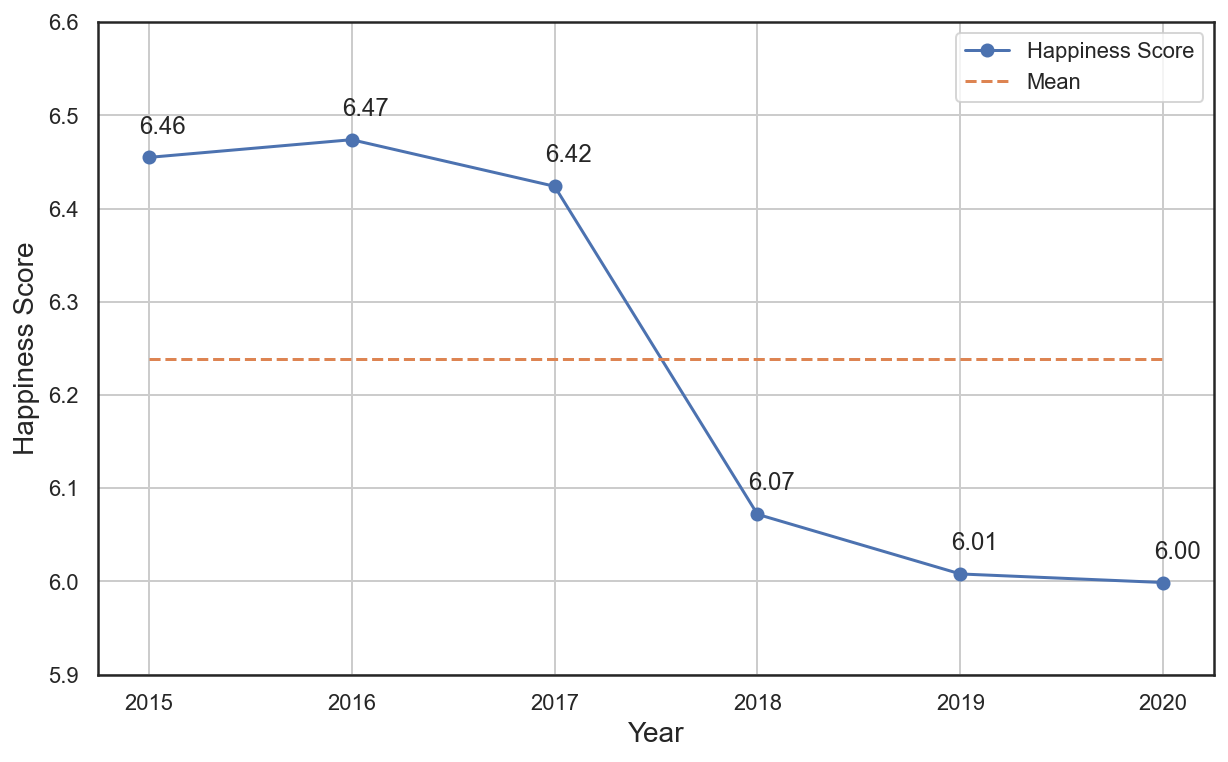

In [35]:
# กำหนดตัวแปร
y=th['Thailand']
x=th.index

# คำนวนค่าเฉลี่ย
y_mean = [y.mean()]*len(x)

fig,ax = plt.subplots(figsize=(10, 6))

# สร้างกราฟจากข้อมูล
score_line = ax.plot(x,y, label='Happiness Score', marker='o')

# สร้างเส้นค่าเฉลี่ย
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--' )

# สร้างคำอธิบายเส้น (Legend)
legend = ax.legend(loc='upper right')

ax.set_ylabel("Happiness Score",fontsize=14)
ax.set_xlabel("Year",fontsize=14)
ax.tick_params("y")
ax.set_ylim(ymin=5.9,ymax=6.6)
ax.grid()

# สร้างคำอธิบายประกอบของค่า Happiness Score ของแต่ละปี
for x,y in zip(x,y):

    label = "{:.2f}".format(y)

    plt.annotate(label, # ตัวเลข
                 (x,y), # ตำแหน่ง
                 textcoords="offset points",
                 xytext=(7,12), # ระยะห่างของตัวเลข
                 ha='center')
    
plt.show()

* จากกราฟแสดงให้เห็นว่าตั้งแต่ปี 2015 จนถึงปี 2020 ความสุขของคนไทยมีแนวโน้มลดลงเรื่อย ๆ และมีแนวโน้มที่จะลดอีกในปีถัด ๆ ไป เพราะตลอดหลายปีที่ผ่านมาประเทศไทยได้เจอมรสุมไม่ว่าจะเป็นด้านเศรษฐกิจ การเมือง หรือแม้แต่ระบบขนส่งสาธารณะที่ไม่สามารถตอบสนองความต้องการของคนไทยได้ดีพอ

In [ ]:
fiftotwen_idx.loc[['Thailand','Sou']]